# Lab 4 solution

In [1]:
import numpy as np

import pylab as plt
%matplotlib inline

# If you have cloned, make sure this is pointing to the correct file, maybe ../data/olympic100m.txt ?
data = np.loadtxt('olympic100m.txt',delimiter=',')
x = data[:,0][:,None]
t = data[:,1][:,None]

# scale the data
x = (x - 1896)/4.0

Start by defining a function to create the matrix $\mathbf{X}$ from our input vector $\mathbf{x}$

In [2]:
def input_matrix(x, k):
    X = np.ones_like(x)
    for i in xrange(1, k + 1):
        X = np.hstack((X, x**i))
    return X

Do the maximum likelihood estimations according to the given equations:
\begin{equation*}
\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{t} \\
\end{equation*}

In [3]:
# Polynomial order
k = 1
X = input_matrix(x, k)
XX = np.dot(X.T, X)
XXinv = np.linalg.inv(XX)
Xt = np.dot(X.T, t)
w = np.dot(XXinv, Xt)

... and $\sigma^2$:
\begin{equation*}
\sigma^2 = \frac{1}{N}(\mathbf{t} - \mathbf{Xw})^T(\mathbf{t} - \mathbf{Xw})
\end{equation*}

In [4]:
tXw = t - np.dot(X, w)
sigma2 = np.dot(tXw.T, tXw) / len(t)

Plot the results (note the scaling of the input data to match the original):

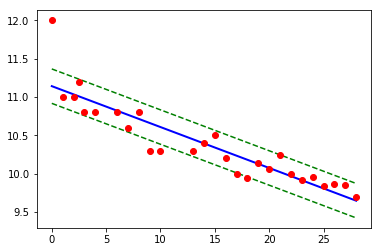

In [5]:
x_test = np.linspace(1896,2008,100)[:,None]
x_test = (x_test - 1896) / 4.0

X_test = input_matrix(x_test, k)
t_test = np.dot(X_test, w)

plt.plot(x_test,t_test,'b-',linewidth=2)
plt.plot(x_test, t_test + np.sqrt(sigma2), 'g--')
plt.plot(x_test, t_test - np.sqrt(sigma2), 'g--')
plt.plot(x,t,'ro')

Finally, we plot the predictive density for 2016. 

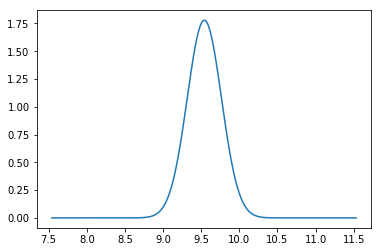

In [6]:
scaled_2016 = (2016 - 1896) / 4.0
X_2016 = input_matrix(scaled_2016, k)
t_2016 = np.dot(X_2016, w)

def gaussian(x, mu, sig):
    return np.exp(-(x - mu)**2 / (2 * sig**2)) / (np.sqrt(2 * np.pi * sig**2))

x = np.arange(t_2016 - 2, t_2016 + 2, .01)
plt.plot(x, gaussian(x, t_2016, np.sqrt(sigma2)).reshape(-1))